In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
train_digits = pd.read_csv("data/mnist_train.csv")
test_digits = pd.read_csv("data/mnist_test.csv")
train_array = train_digits.to_numpy()
test_array = test_digits.to_numpy()

In [2]:
def show_digit(sample):
    """
    shows digit
    """
    img = test_array[sample-1, 1:]
    img.shape = (28,28)
    plt.imshow(img, 'gray')

In [3]:
def avg_digit_img(dat, digit):
    """
    compute average intensities of all rows describing the same number
    imshow as output
    """

    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    avg = np.zeros((1,784))
    
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]
    
    avg.shape = (28,28)
    avg /= len(list_digit)

    plt.imshow(avg, 'gray')
    plt.colorbar()


In [4]:
def avg_digit_arr(dat, digit):
    """
    computes average intensities of all rows describing the same number
    returns numpy array
    """
   
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    avg = np.zeros((1,784))

    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]

    avg /= len(list_digit)

    return avg

In [5]:
def digit_recognition(sample):
    """
    compare sample image with averaged images pixel by pixel
    select digit with lowest difference in intensity (output)
    """
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:]

    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))

In [6]:
def return_label(sample):
    """
    can be used for validation
    """
    return test_array[sample-1, 0]

In [7]:
avg_list = []

for i in range(0,10):
    avg_list.append(avg_digit_arr(train_array, i))

def digit_recognition_fast(sample):
    """
    faster digit recognition because avg images are stored at the beginning and not calculated each time
    """
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:] 

    for i in range(0,10):
        diff_arr = sample_img - avg_list[i]
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))

In [11]:
#Überprüfung digit recognition mit methode vergleich zu avg images

true = 0
false = 0

#for i in range(0, test_array.shape[0]):
#if digit_recognition_fast(i+1) == test_array[i, 0]:
    true += 1
else:
    false += 1

#print(f'Anzahl richtig erkannter Digits: {true} \n\
Anzahl falsch erkannter Digits: {false} \n\
Richtig: {true/test_array.shape[0]*100} Prozent')
#66,85 Prozent

Anzahl richtig erkannter Digits: 1 
Anzahl falsch erkannter Digits: 0 
Richtig: 0.010001000100010001 Prozent


In [12]:
#plots for project proposal

#plt.hist(train_array[:,0], rwidth = 0.9)
#plt.xlabel('digits')
#plt.ylabel('counts')
#plt.title('training dataset')


In [8]:
def digit_rec_comp(sample):
    """
    nice output for digit recognition comparison
    """
    
    print(f'Prediction: {digit_recognition(sample)}\n\
Real digit: {return_label(sample)}')
    show_digit(sample)

In [9]:
#Z-Transformation
#Druchschnittsberechnung

mean_pixels = np.zeros((1, 784))
for i in range(0, train_array.shape[0]):
    mean_pixels += train_array[i, 1:train_array.shape[1]]
mean_pixels /= train_array.shape[0]

#Standardabweichung
std_pixels = np.zeros((1, 784))
for i in range(1, train_array.shape[1]):
    std_pixels[0, i-1] = np.std(train_array[:, i])

#print(std_pixels)

#Erstellen z-array 
z_array = np.zeros(train_array.shape)

for i in range(0, train_array.shape[0]):
    z_array[i, 0] = train_array[i, 0]
    for j in range(1, train_array.shape[1]):
        if std_pixels[0, j-1] != 0:
            z_array[i, j] = (train_array[i, j] - mean_pixels[0, j-1])/std_pixels[0, j-1]

#print(z_array)


In [10]:
def kNN(img, k=5):
    counter = [0,0,0,0,0,0,0,0,0,0]
    max_indices = []

    M = 1
    N = train_array[:, 1:].shape[0]

    img_dots = (img*img).sum(axis=0).reshape((M,1))*np.ones(shape=(1,N))
    train_array_dots = (train_array[:, 1:]*train_array[:, 1:]).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  img_dots + train_array_dots - 2*img.dot(train_array[:, 1:].T)
    D = np.sqrt(D_squared)
    
    dist_mau = D.tolist()
    dist = dist_mau[0]
    small_dist = sorted(range(len(dist)), key = lambda sub: dist[sub])[:k]
    
    for j in range(0, len(small_dist)):
        counter[train_array[small_dist[j],0]] += 1

    for k in range(0, len(counter)):
        if counter[k] == max(counter):
            max_indices.append(k)

    if len(max_indices) == 1:
        return max_indices[0]

    else:
        return 10

In [11]:
def validation_kNN(s_size, k=5):
    true = 0
    false = 0
    doppel_max = 0

    for i in range(0, s_size):
        result_kNN = kNN(test_array[i, 1:], k)
        if result_kNN == 10:
            doppel_max += 1
        elif result_kNN != test_array[i, 0]:
            false += 1
        elif result_kNN == test_array[i, 0]:
            true += 1

    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
Anzahl mit mehreren Maxima: {doppel_max}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')


In [13]:
#liste mit indexen von Spalten mit Std = 0
std0 = []
for i in range(1, z_array.shape[1]):
    if np.std(z_array[:, i]) == 0:
        std0.append(i)

print(std0)
    

67


In [17]:
# Spalten mit Std = 0 löschen
z_cleaned = np.delete(z_array, std0, 1)

print(z_cleaned[:, 1:])

[[-0.00441811 -0.00575487 -0.00408255 ... -0.0114323  -0.00900737
  -0.00577044]
 [-0.00441811 -0.00575487 -0.00408255 ... -0.0114323  -0.00900737
  -0.00577044]
 [-0.00441811 -0.00575487 -0.00408255 ... -0.0114323  -0.00900737
  -0.00577044]
 ...
 [-0.00441811 -0.00575487 -0.00408255 ... -0.0114323  -0.00900737
  -0.00577044]
 [-0.00441811 -0.00575487 -0.00408255 ... -0.0114323  -0.00900737
  -0.00577044]
 [-0.00441811 -0.00575487 -0.00408255 ... -0.0114323  -0.00900737
  -0.00577044]]


In [20]:
#correlation
cov_arr = np.cov(z_cleaned[:, 1:], rowvar = False)
print(cov_arr)

[[ 1.00001667e+00  8.14626297e-01  8.58732902e-02 ... -5.05100474e-05
  -3.97962562e-05 -2.54949003e-05]
 [ 8.14626297e-01  1.00001667e+00  6.47825950e-01 ... -6.57924580e-05
  -5.18370830e-05 -3.32086831e-05]
 [ 8.58732902e-02  6.47825950e-01  1.00001667e+00 ... -4.66737173e-05
  -3.67736581e-05 -2.35585162e-05]
 ...
 [-5.05100474e-05 -6.57924580e-05 -4.66737173e-05 ...  1.00001667e+00
   4.42324627e-01  2.06565969e-01]
 [-3.97962562e-05 -5.18370830e-05 -3.67736581e-05 ...  4.42324627e-01
   1.00001667e+00  8.55525974e-01]
 [-2.54949003e-05 -3.32086831e-05 -2.35585162e-05 ...  2.06565969e-01
   8.55525974e-01  1.00001667e+00]]


In [21]:
#eigenvectors and eigenvalues 
eigen_val, eigen_vec = np.linalg.eigh(cov_arr)
print(eigen_val)
print(eigen_vec)

[-6.11271664e-15  2.09728885e-16  2.48011244e-16  7.73574405e-15
  8.11916860e-15  6.56559421e-03  7.17242610e-03  1.38856543e-02
  1.83222195e-02  1.89439930e-02  2.02922886e-02  2.10721687e-02
  2.15000214e-02  2.16653520e-02  2.22651877e-02  2.29988782e-02
  2.33364299e-02  2.35874779e-02  2.37959530e-02  2.39529612e-02
  2.42223833e-02  2.44673522e-02  2.48620241e-02  2.51050188e-02
  2.54161350e-02  2.56060351e-02  2.60784906e-02  2.61225089e-02
  2.65607084e-02  2.68438062e-02  2.70108038e-02  2.73867691e-02
  2.74431028e-02  2.77585942e-02  2.78190517e-02  2.83082139e-02
  2.85708727e-02  2.86479644e-02  2.88833577e-02  2.92633461e-02
  2.94318299e-02  2.97937344e-02  2.99648572e-02  3.00696674e-02
  3.06073801e-02  3.08693630e-02  3.11397413e-02  3.13029028e-02
  3.15566454e-02  3.17925368e-02  3.21040424e-02  3.23099691e-02
  3.24663267e-02  3.28585882e-02  3.30325896e-02  3.30426565e-02
  3.33339432e-02  3.39545724e-02  3.41492550e-02  3.43131987e-02
  3.45246437e-02  3.46116

In [22]:
# np.argsort returns indeices that would sort and array

index_sorted = np.argsort(eigen_val)[::-1]

sorted_eigenval = eigen_val[index_sorted]
sorted_eigenvec = eigen_vec[:,index_sorted]

print(sorted_eigenval)

[ 4.04879522e+01  2.92418826e+01  2.68120471e+01  2.06861667e+01
  1.80768493e+01  1.57335555e+01  1.37907898e+01  1.25177109e+01
  1.10069491e+01  1.00506591e+01  9.62060072e+00  8.63113407e+00
  7.99180456e+00  7.81423824e+00  7.37548917e+00  7.13068048e+00
  6.71326810e+00  6.60363859e+00  6.40634233e+00  6.23722524e+00
  5.93203443e+00  5.76066446e+00  5.48421547e+00  5.31865091e+00
  5.12873847e+00  4.96094870e+00  4.90538041e+00  4.70830714e+00
  4.52925634e+00  4.39475181e+00  4.27527777e+00  4.21406925e+00
  4.09839381e+00  4.03206216e+00  3.97720780e+00  3.86042989e+00
  3.80868785e+00  3.72566415e+00  3.64396084e+00  3.44178438e+00
  3.41624470e+00  3.36376434e+00  3.25768833e+00  3.23622704e+00
  3.20480879e+00  3.17913695e+00  3.14209332e+00  3.08595628e+00
  3.06067580e+00  3.03762298e+00  2.90165958e+00  2.86408643e+00
  2.84982613e+00  2.82378562e+00  2.76634190e+00  2.71777054e+00
  2.69167365e+00  2.65853093e+00  2.61670152e+00  2.57616306e+00
  2.52663358e+00  2.49374

In [23]:
#subset from eigenvalue matrix
n_components = 30
eigenvec_subset = sorted_eigenvec[:, 0:n_components]

In [24]:
#transform data

X_reduced = np.dot(eigenvec_subset.transpose(), z_cleaned[:, 1:].transpose()).transpose()
X_reduced.shape

(59999, 30)

In [29]:
#jetzt komplett als Funktion:
#input ist normale matrix, z-Transformation und Löschen von std=0 Spalten wird hier in Funktion gemacht

def PCA(X_no_label, num_components):

    #z-transformation
    std0 = []
    for i in range(0, X_no_label.shape[1]):
        if np.std(X_no_label[:, i]) == 0:
            std0.append(i)
    X_cleaned =  np.delete(X_no_label, std0, 1)

    X_z = (X_cleaned - np.mean(X_cleaned, axis = 0))/np.std(X_cleaned, axis = 0)

    #variance
    cov_arr = np.cov(X_z, rowvar = False)

    #eigenvalues, eigenvectors
    eigen_val, eigen_vec = np.linalg.eigh(cov_arr)

    #sorting
    index_sorted = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[index_sorted]
    sorted_eigenvec = eigen_vec[:,index_sorted]

    #selecting subset
    eigenvec_subset = sorted_eigenvec[:, 0:num_components]

    #dimension reduction
    X_reduced = np.dot(eigenvec_subset.transpose(), X_z.transpose()).transpose()

    return X_reduced
    

In [39]:
pca10 = PCA(train_array[:, 1:], 10)
pca10.shape

pca30 = PCA(train_array[:, 1:], 30)

In [40]:

PCA2_df = pd.DataFrame(pca10[:, 0:2], columns = ['PC1', 'PC2'])
PCA2_df = pd.concat([PCA2_df, pd.DataFrame(train_array[:, 0])], axis = 1)

In [41]:
PCA2_30_df = pd.DataFrame(pca30[:, 0:2], columns = ['PC1', 'PC2'])
PCA2_30_df = pd.concat([PCA2_30_df, pd.DataFrame(train_array[:, 0])], axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

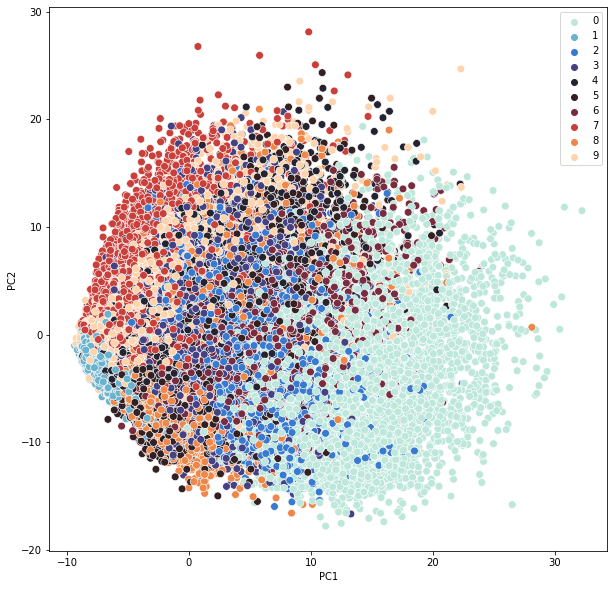

In [46]:
import seaborn as sb

plt.figure(figsize = (10,10))
sb.scatterplot(data = PCA2_30_df, x = 'PC1', y = 'PC2', hue = train_array[:, 0] ,s = 60, palette = 'icefire', legend='full')